**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

**DATA PREPROCESSING**

In [96]:
df = pd.read_csv('mcdonalds.csv')
attributes = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


# for column in attributes:

#   df[column] = df[column].map({'Yes':1, 'No':0})

df['freq/year'] = df['VisitFrequency'].map({'Every three months':4, 'Once a month':12, 'Once a year':1, 'Once a week':52, 'More than once a week':52, 'Never':0})
df['Like'] = df['Like'].str.extract('(\d+)').astype(int)
df.drop(['VisitFrequency'], inplace=True, axis=1)
#df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df['disgusting'] = df['disgusting'].map({'No':0, 'Yes':1})

# extracting descriptor variables
X = df.iloc[:, 11:15]

**MEAN FREQUENCY OF EACH AGE GROUP**

In [82]:
# Young
X['freq/year'][(X['Age']>0) & (X['Age']<35)].sum()/X[(X['Age']>0) & (X['Age']<35)].dropna().shape[0]

21.360576923076923

In [91]:
# Adult
X['freq/year'][(X['Age']>35) & (X['Age']<52)].sum()/X[(X['Age']>35) & (X['Age']<52)].dropna().shape[0]

16.034782608695654

In [92]:
# Senior
X['freq/year'][(X['Age']>52) & (X['Age']<100)].sum()/X[(X['Age']>52) & (X['Age']<100)].dropna().shape[0]

9.299412915851272

In [52]:
X.shape

(1453, 3)

**MEAN FREQUECY FOR EACH GENDER**

In [89]:
# Male
X['freq/year'][X['Gender']==1].sum()/X[X['Gender']==1].dropna().shape[0]

16.04812030075188

In [90]:
# Male
X['freq/year'][X['Gender']==0].sum()/X[X['Gender']==0].dropna().shape[0]

14.269035532994923

In [30]:
# X.to_csv('sample.csv')

**CLUSTERING THE DATA**

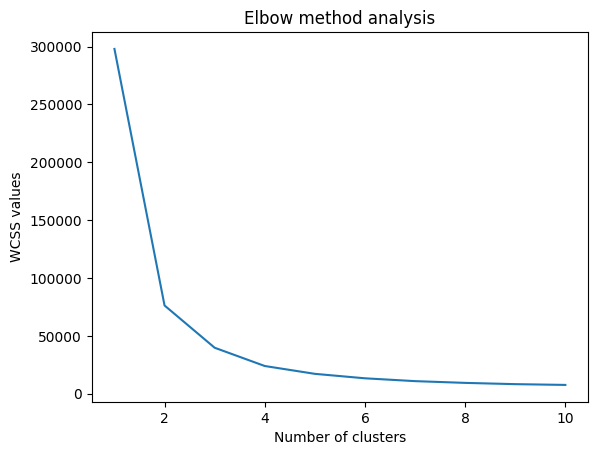

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method analysis')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [56]:
kmeansmodel = KMeans(n_clusters = 3, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

In [99]:
# Printing the centres of clusters 
kmeansmodel.cluster_centers_

array([[ 2.66727605, 59.69104205,  0.43327239],
       [ 2.94843049, 27.33183857,  0.46188341],
       [ 2.68043478, 43.41304348,  0.4826087 ]])

**PLOTTING THE CLUSTERS**

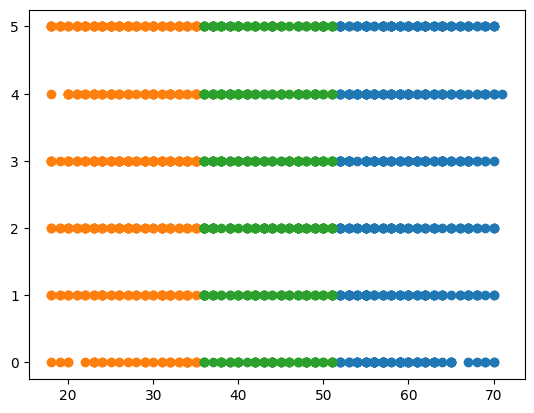

In [70]:
import matplotlib.pyplot as plt

x1 = X['Age'].to_numpy()
x3 = X['Like'].to_numpy()

fig = plt.figure()
ax = plt.axes()

colors = ['green','red','cyan']

for i in range(3):

  masked = X[X['cluster']==i]
  x1 = masked['Age'].to_numpy()
  x3 = masked['Like'].to_numpy()
  ax.scatter(x1, x3, cmap=colors[i]);


(<Figure size 640x480 with 3 Axes>,
 {('Female', '3'): (0.0, 0.0, 0.539628081204439, 0.21844054256470002),
  ('Female', '2'): (0.0,
   0.22171923108929018,
   0.539628081204439,
   0.17100773903636518),
  ('Female', '1'): (0.0,
   0.3960056586502455,
   0.539628081204439,
   0.1348090205542149),
  ('Female', '4'): (0.0,
   0.5340933677290506,
   0.539628081204439,
   0.15103603228759252),
  ('Female', '5'): (0.0,
   0.6884080885412333,
   0.539628081204439,
   0.20221353083132232),
  ('Female', '0'): (0.0,
   0.8939003078971458,
   0.539628081204439,
   0.10609969210285432),
  ('Male', '3'): (0.5446032055825484,
   0.0,
   0.45539679441745173,
   0.18784666584494022),
  ('Male', '2'): (0.5446032055825484,
   0.19112535436953038,
   0.45539679441745173,
   0.1612227289535314),
  ('Male', '1'): (0.5446032055825484,
   0.35562677184765196,
   0.45539679441745173,
   0.15086897571798347),
  ('Male', '4'): (0.5446032055825484,
   0.5097744360902255,
   0.45539679441745173,
   0.162701836558

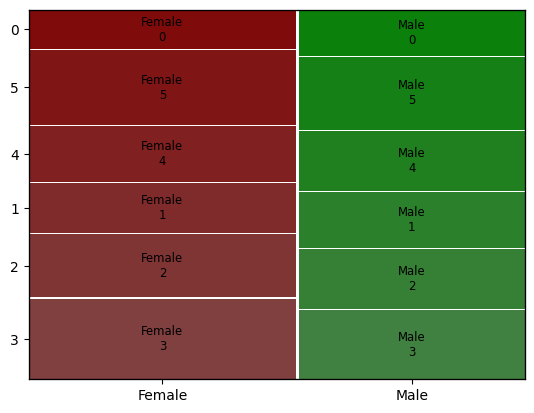

In [97]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X, ['Gender','Like'])